In [61]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import difflib


In [62]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
movie_data = pd.read_csv('/content/drive/MyDrive/movies.csv')

In [64]:
movie_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [65]:
movie_data.shape

(4803, 24)

In [66]:
movie_data.isnull().sum()

,0
index,0
budget,0
genres,28
homepage,3091
id,0
keywords,412
original_language,0
original_title,0
overview,3
popularity,0


In [67]:
#selecte the important features for our project
selected_feature = ['genres','keywords','tagline','cast','director']

In [68]:
print (selected_feature)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [69]:
#fill the nulls in mt selected
for features in selected_feature:
  movie_data[features] = movie_data[features].fillna('')

In [ ]:
print ( selected_feature)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [70]:
#make a combination with my selected feature to conver it to numbers
combined_feature = movie_data['genres']+' '+ movie_data['keywords']+' '+movie_data['tagline']+' '+movie_data['cast']+' '+movie_data['director']

In [71]:
print (combined_feature)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [72]:
vectorizer = TfidfVectorizer()


In [73]:
#converte the data to numbers to train the model
feature_vectorized= vectorizer.fit_transform(combined_feature)

In [74]:
print (feature_vectorized)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 124266 stored elements and shape (4803, 17318)>
  Coords	Values
  (0, 201)	0.07860022416510505
  (0, 274)	0.09021200873707368
  (0, 5274)	0.11108562744414445
  (0, 13599)	0.1036413987316636
  (0, 5437)	0.1036413987316636
  (0, 3678)	0.21392179219912877
  (0, 3065)	0.22208377802661425
  (0, 5836)	0.1646750903586285
  (0, 14378)	0.33962752210959823
  (0, 16587)	0.12549432354918996
  (0, 3225)	0.24960162956997736
  (0, 14271)	0.21392179219912877
  (0, 4945)	0.24025852494110758
  (0, 15261)	0.07095833561276566
  (0, 16998)	0.1282126322850579
  (0, 11192)	0.09049319826481456
  (0, 11503)	0.27211310056983656
  (0, 13349)	0.15021264094167086
  (0, 17007)	0.23643326319898797
  (0, 17290)	0.20197912553916567
  (0, 13319)	0.2177470539412484
  (0, 14064)	0.20596090415084142
  (0, 16668)	0.19843263965100372
  (0, 14608)	0.15150672398763912
  (0, 8756)	0.22709015857011816
  :	:
  (4801, 403)	0.17727585190343229
  (4801, 4835)	0.247137650

In [75]:
#find the similarity between data
similarity = cosine_similarity(feature_vectorized)

In [76]:
print (similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [77]:
print (similarity.shape)

(4803, 4803)


In [78]:
selected_movie = input("please enter the movie name: ")

please enter the movie name: iron


In [79]:
list_of_all_titles= movie_data['title'].tolist()

In [80]:
print (list_of_all_titles)


['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [81]:
#print relevante movies
relevante_movie = difflib.get_close_matches(selected_movie , list_of_all_titles)

In [82]:
print (relevante_movie)

['Nixon', 'Airborne', 'Prison']


In [83]:
close_match= relevante_movie[-1]

In [84]:
print(close_match)

Prison


In [85]:
index_of_the_movie=movie_data[movie_data.title==close_match]['index'].values[0]

In [86]:
print (index_of_the_movie)

3785


In [87]:
similarity_score= list(enumerate(similarity[index_of_the_movie]))

In [88]:
print (similarity_score)

[(0, np.float64(0.0)), (1, np.float64(0.0)), (2, np.float64(0.009096818145771297)), (3, np.float64(0.04911657966268313)), (4, np.float64(0.0)), (5, np.float64(0.0)), (6, np.float64(0.016516857234888955)), (7, np.float64(0.0376009060868865)), (8, np.float64(0.01777664125743645)), (9, np.float64(0.05258954541245044)), (10, np.float64(0.0)), (11, np.float64(0.036739075138742625)), (12, np.float64(0.0)), (13, np.float64(0.0)), (14, np.float64(0.04079820055016712)), (15, np.float64(0.03556621925697953)), (16, np.float64(0.01561837128329099)), (17, np.float64(0.0)), (18, np.float64(0.021067811390172275)), (19, np.float64(0.0)), (20, np.float64(0.0)), (21, np.float64(0.0)), (22, np.float64(0.0)), (23, np.float64(0.0)), (24, np.float64(0.003013036946617244)), (25, np.float64(0.009056842573802903)), (26, np.float64(0.0)), (27, np.float64(0.005284917808345249)), (28, np.float64(0.005802216081997728)), (29, np.float64(0.006069981978108664)), (30, np.float64(0.0)), (31, np.float64(0.0)), (32, np.f

In [89]:
sorted_movie=sorted(similarity_score , key=lambda x:x[1],reverse=True)

In [90]:
print(sorted_movie)

[(3785, np.float64(1.0000000000000002)), (2445, np.float64(0.15463658724707924)), (2207, np.float64(0.14680218051910046)), (517, np.float64(0.13755674691726352)), (659, np.float64(0.12693857820120769)), (2733, np.float64(0.11675578936444542)), (1512, np.float64(0.11525856438360749)), (2163, np.float64(0.11364658341718403)), (2703, np.float64(0.11333072505602693)), (478, np.float64(0.1103571258686287)), (3644, np.float64(0.10675384697139684)), (330, np.float64(0.10670972469107685)), (573, np.float64(0.10555339440541782)), (2168, np.float64(0.10527366908221812)), (346, np.float64(0.10431184266831563)), (610, np.float64(0.10347862931019383)), (3220, np.float64(0.10237981923129992)), (1881, np.float64(0.10170906969577428)), (3646, np.float64(0.10017180130019909)), (644, np.float64(0.09966179249657557)), (3292, np.float64(0.09770522415467586)), (823, np.float64(0.09724826451955276)), (3310, np.float64(0.09724587307822284)), (1931, np.float64(0.09578441495735548)), (2901, np.float64(0.095216

In [91]:
print("movies sugessted for you  : ")
i=0
for movie in sorted_movie:
  index  = movie[0]
  title_from_index = movie_data[movie_data.index==index]['title'].values
  if (i<31):
    print(i,'=>',title_from_index)
    i+=1

movies sugessted for you  : 
0 => ['Prison']
1 => ['The Apparition']
2 => ['12 Rounds']
3 => ['Exorcist: The Beginning']
4 => ['The Long Kiss Goodnight']
5 => ['A Nightmare on Elm Street 4: The Dream Master']
6 => ['A History of Violence']
7 => ['The Covenant']
8 => ['A Walk on the Moon']
9 => ['Daylight']
10 => ['Albino Alligator']
11 => ['The Lord of the Rings: The Two Towers']
12 => ['Die Hard 2']
13 => ['Appaloosa']
14 => ['What Lies Beneath']
15 => ['The Legend of Hercules']
16 => ['The Haunting in Connecticut 2: Ghosts of Georgia']
17 => ['The Shawshank Redemption']
18 => ['Standard Operating Procedure']
19 => ['Cliffhanger']
20 => ['Wuthering Heights']
21 => ['Crimson Tide']
22 => ['Far from Men']
23 => ['The Road']
24 => ['5 Days of War']
25 => ['Boiler Room']
26 => ['A Dangerous Method']
27 => ['Eastern Promises']
28 => ['Harley Davidson and the Marlboro Man']
29 => ['The Adventures of Ford Fairlane']
30 => ['Paranormal Activity 3']


Movie Recommendation system


In [99]:
selected_movie = input("please enter the movie name: ")
list_of_all_titles= movie_data['title'].tolist()
relevante_movie = difflib.get_close_matches(selected_movie , list_of_all_titles)
close_match= relevante_movie[0]
index_of_the_movie=movie_data[movie_data.title==close_match]['index'].values[0]
similarity_score= list(enumerate(similarity[index_of_the_movie]))
sorted_movie=sorted(similarity_score , key=lambda x:x[1],reverse=True)
print ("movies sugestted for you : ")
i=0
i=0
for movie in sorted_movie:
  index  = movie[0]
  title_from_index = movie_data[movie_data.index==index]['title'].values
  if (i<31):
    print(i,'=>',title_from_index)
    i+=1

please enter the movie name: iron man 
movies sugestted for you : 
0 => ['Iron Man 3']
1 => ['Iron Man 2']
2 => ['Iron Man']
3 => ['Avengers: Age of Ultron']
4 => ['Captain America: Civil War']
5 => ['The Avengers']
6 => ['Ant-Man']
7 => ['X-Men: Days of Future Past']
8 => ['Kiss Kiss Bang Bang']
9 => ['The Helix... Loaded']
10 => ['X-Men']
11 => ['Sherlock Holmes']
12 => ['X-Men: The Last Stand']
13 => ['X-Men: Apocalypse']
14 => ['X2']
15 => ['The Time Machine']
16 => ['Sherlock Holmes: A Game of Shadows']
17 => ['Sky Captain and the World of Tomorrow']
18 => ['Lions for Lambs']
19 => ['The Incredible Hulk']
20 => ['Captain America: The Winter Soldier']
21 => ['The Amazing Spider-Man 2']
22 => ['Duets']
23 => ['Deadpool']
24 => ['Thor: The Dark World']
25 => ['X-Men Origins: Wolverine']
26 => ['X-Men: First Class']
27 => ['Shallow Hal']
28 => ['Captain America: The First Avenger']
29 => ['The League of Extraordinary Gentlemen']
30 => ['The Good Night']


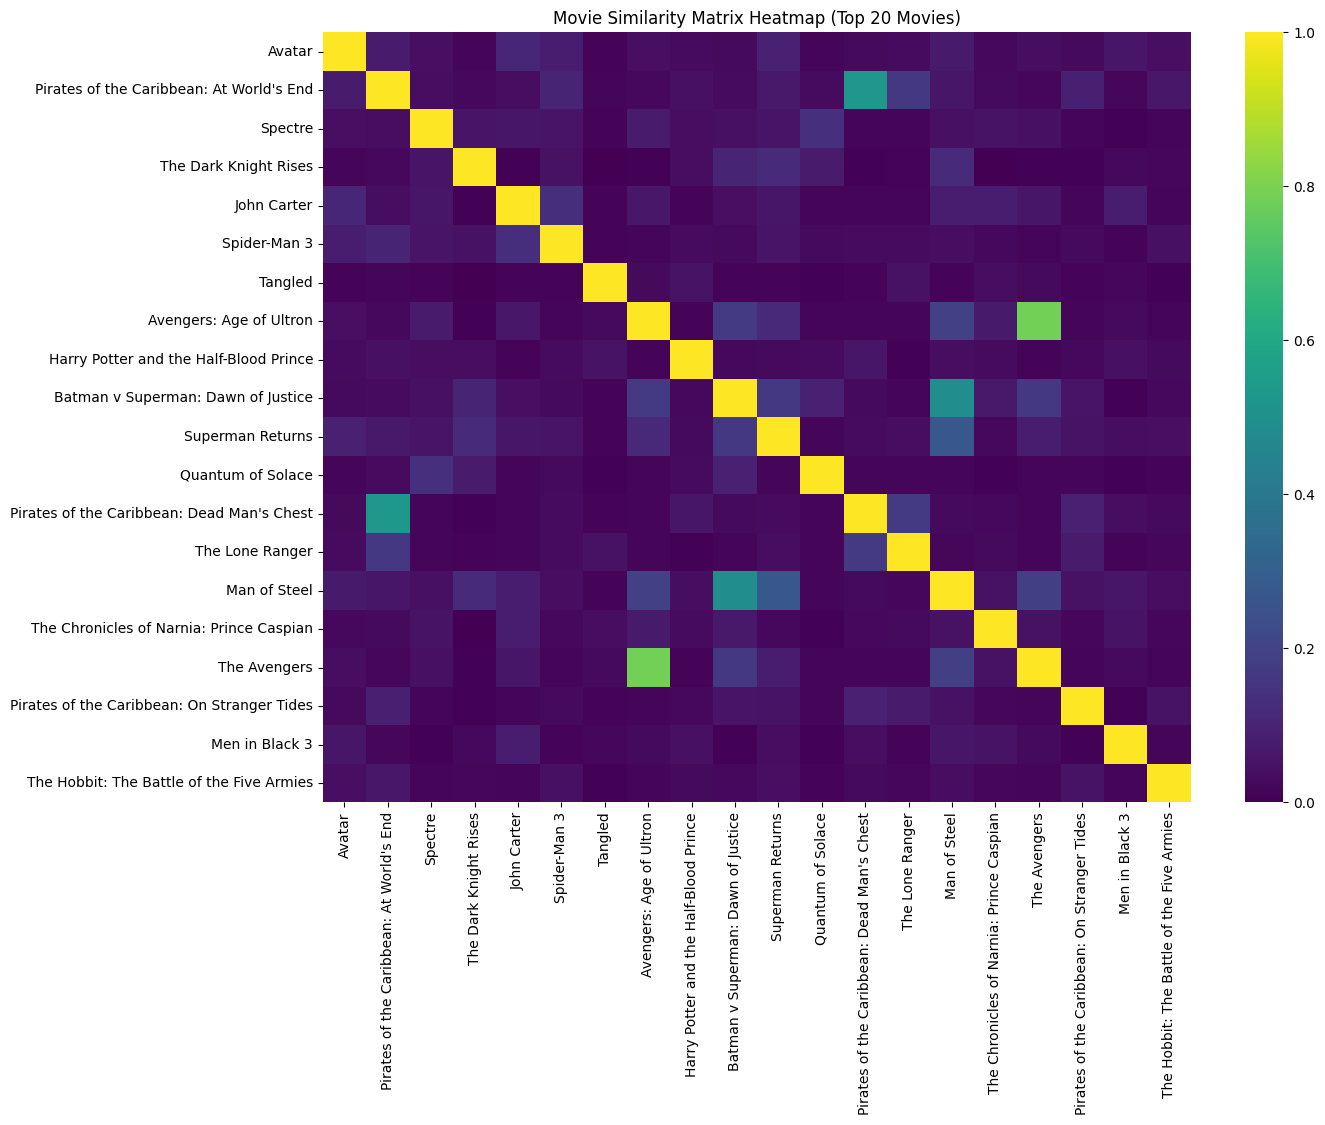

In [101]:
# Choose first 20 movies for visualization
subset_similarity = similarity[:20, :20]
subset_titles = movie_data['title'].head(20)

plt.figure(figsize=(14, 10))
sns.heatmap(subset_similarity, xticklabels=subset_titles, yticklabels=subset_titles, cmap="viridis")
plt.title("Movie Similarity Matrix Heatmap (Top 20 Movies)")
plt.xticks(rotation=90)
plt.show()

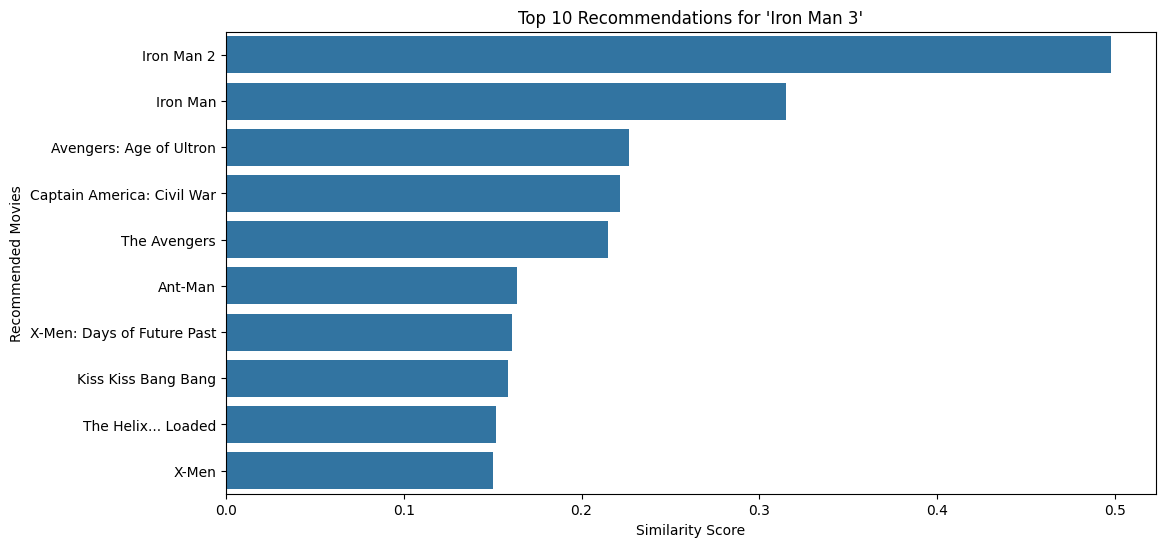

In [103]:
selected_movie = "iron man "   # <- you can replace with user input

# Find best title match
list_of_all_titles = movie_data['title'].tolist()
relevant_movie = difflib.get_close_matches(selected_movie, list_of_all_titles)
close_match = relevant_movie[0]

movie_index = movie_data[movie_data.title == close_match].index[0]

# Calculate similarity scores and sort
similarity_score = list(enumerate(similarity[movie_index]))
sorted_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

top_10 = sorted_movies[1:11]  # skip itself (index 0)

rec_titles = [movie_data.iloc[i[0]].title for i in top_10]
rec_scores = [i[1] for i in top_10]

plt.figure(figsize=(12, 6))
sns.barplot(x=rec_scores, y=rec_titles)
plt.title(f"Top 10 Recommendations for '{close_match}'")
plt.xlabel("Similarity Score")
plt.ylabel("Recommended Movies")
plt.show()

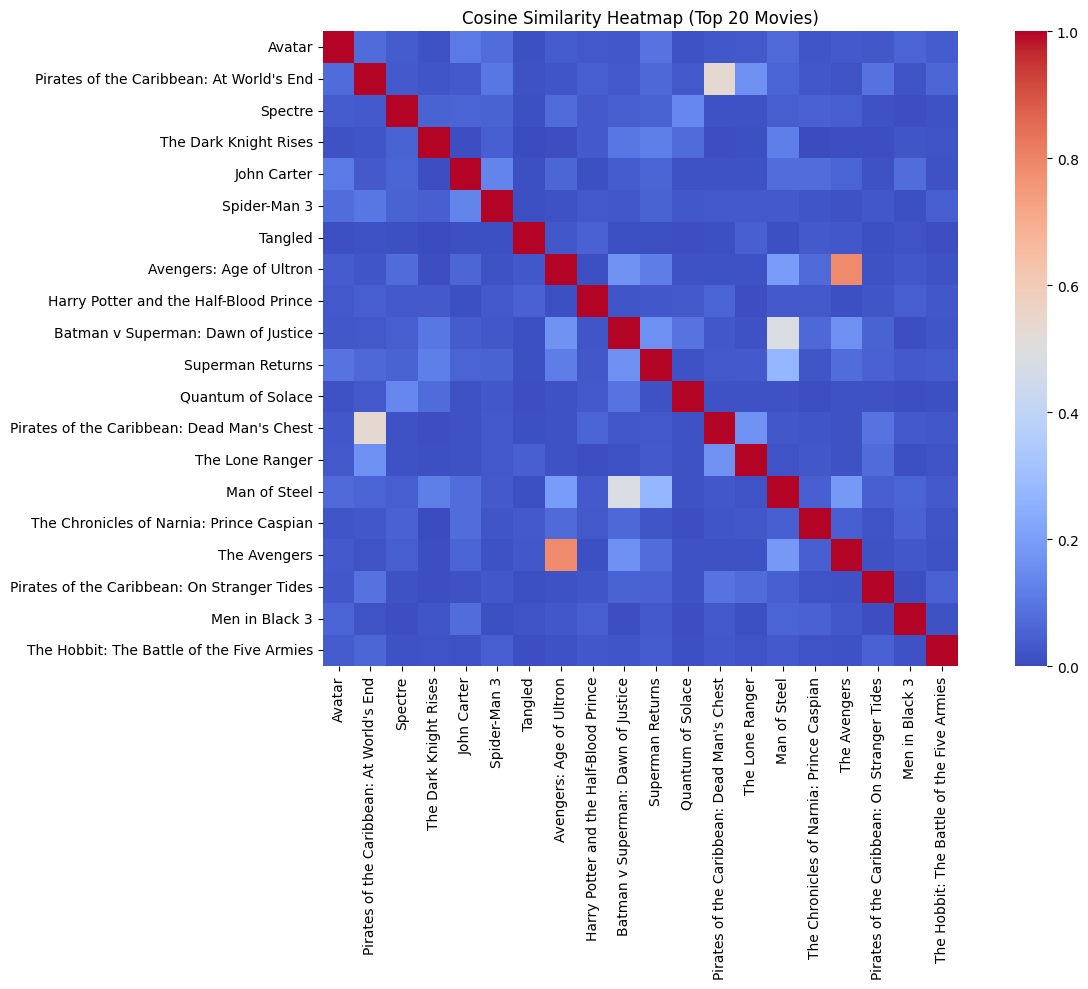

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- COSINE SIMILARITY VISUALIZATION (TOP 20 MOVIES) ---- #

# Select the first 20 movies for visualization
similarity_subset = similarity[:20, :20]

movie_titles = movie_data['title'].head(20).tolist()

plt.figure(figsize=(14, 10))
sns.heatmap(similarity_subset,
            xticklabels=movie_titles,
            yticklabels=movie_titles,
            cmap="coolwarm",
            square=True)

plt.title("Cosine Similarity Heatmap (Top 20 Movies)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
